# Fitting a straight line using Feed Forward Neural Network

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [2]:
# Define the Linear Regression Model
class LinearRegressionModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)
    
    def forward(self, x):
        return self.linear(x)

In [3]:
# Generate dummy data
torch.manual_seed(42)
X = torch.randn(100, 1)
y = 3 * X + 2 + 0.1 * torch.randn(100, 1)  # y = 3x + 2 with noise

In [ ]:
# Initialize model, loss function, and optimizer
model = LinearRegressionModel(input_dim=1, output_dim=1)
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)


In [5]:
# Training loop
epochs = 1000
for epoch in range(epochs):
    optimizer.zero_grad()
    outputs = model(X)
    loss = criterion(outputs, y)
    loss.backward()
    optimizer.step()
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')


Epoch [100/1000], Loss: 0.1429
Epoch [200/1000], Loss: 0.0102
Epoch [300/1000], Loss: 0.0078
Epoch [400/1000], Loss: 0.0078
Epoch [500/1000], Loss: 0.0078
Epoch [600/1000], Loss: 0.0078
Epoch [700/1000], Loss: 0.0078
Epoch [800/1000], Loss: 0.0078
Epoch [900/1000], Loss: 0.0078
Epoch [1000/1000], Loss: 0.0078


In [6]:
# Print final parameters
for name, param in model.named_parameters():
    print(f'{name}: {param.data}')


linear.weight: tensor([[3.0012]])
linear.bias: tensor([2.0036])


In [7]:
# Plot data, predictions, and learned parameters
with torch.no_grad():
    predicted = model(X)


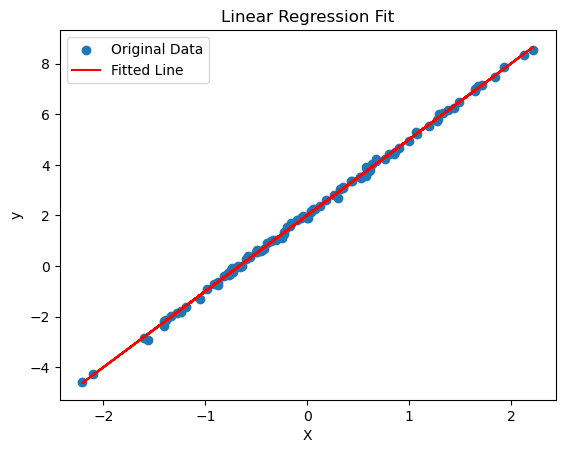

In [8]:
plt.scatter(X.numpy(), y.numpy(), label='Original Data')
plt.plot(X.numpy(), predicted.numpy(), color='red', label='Fitted Line')
plt.legend()
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression Fit')
plt.show()
